# **1. Perkenalan Dataset**


Data Students Performance in Exams adalah kumpulan data yang terdiri dari nilai yang diperoleh oleh siswa dalam berbagai mata pelajaran, terdiri dari 1000 baris dan 8 kolom.

**Link Dataset:** https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

# **2. Import Library**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# **3. Memuat Dataset**

In [4]:
df = pd.read_csv("StudentsPerformance.csv")
print(df.shape)
df.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Insight :** Dataset memiliki 1000 baris dan 8 kolom, terdiri dari kombinasi fitur kategori dan numerik yang berkaitan dengan siswa dan performa akademiknya.

# **4. Exploratory Data Analysis (EDA)**



In [5]:
# Data Info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insight:**
* Dataset berisi 1000 siswa dengan data lengkap tanpa missing value.

* Rata-rata nilai matematika 66, membaca 69, dan menulis 68, menunjukkan nilai membaca dan menulis sedikit lebih tinggi daripada matematika.

* Nilai terendah matematika 0, membaca 17, menulis 10; nilai tertinggi di semua mata pelajaran 100.

* Variasi nilai cukup besar dengan standar deviasi sekitar 15 untuk ketiga mata pelajaran.

* Distribusi nilai relatif merata dengan median sekitar 66-70 dan kuartil atas di kisaran 77-79.

In [6]:
# Cek Missing Values
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


**Insight:**
* Tidak ada data yang hilang (missing value) pada semua kolom.

* Semua 1000 entri lengkap untuk fitur kategori maupun nilai ujian.

* Data ini siap untuk analisis dan pemodelan tanpa perlu penanganan missing value terlebih dahulu.

In [7]:
# Distribusi Target
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

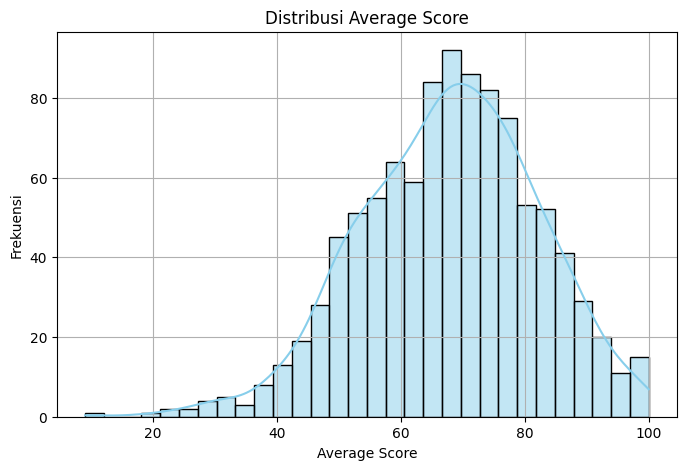

In [8]:
# Distribusi average_score
plt.figure(figsize=(8, 5))
sns.histplot(df['average_score'], kde=True, bins=30, color='skyblue')
plt.title("Distribusi Average Score")
plt.xlabel("Average Score")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()

**Insight :**

* Sebagian besar siswa memiliki skor rata-rata di kisaran 60–80, menunjukkan distribusi nilai yang terkonsentrasi pada level menengah.

* Distribusi bersifat simetris, tanpa kemiringan tajam ke kanan atau kiri, mengindikasikan bahwa nilai tidak terlalu berat ke skor rendah atau tinggi.

* Sedikit siswa yang memiliki nilai sangat rendah (di bawah 40) maupun sangat tinggi (di atas 90), menunjukkan bahwa ekstrem pada data jarang terjadi.

* Tidak terdapat anomali mencolok atau outlier besar dalam sebaran nilai rata-rata siswa secara keseluruhan.


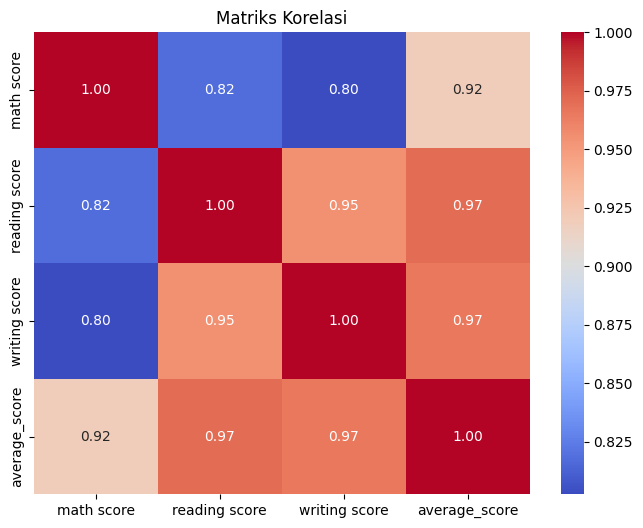

In [9]:
plt.figure(figsize=(8, 6))
numeric_cols = ['math score', 'reading score', 'writing score', 'average_score']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

**Insight :**
* average_score sangat berkorelasi kuat dengan semua skor individual:

1. Korelasi tertinggi dengan reading_score dan writing_score (0.97)

2. Korelasi sedikit lebih rendah dengan math_score (0.92)

* Terdapat korelasi sangat tinggi antara reading_score dan writing_score (0.95), menunjukkan bahwa kemampuan membaca dan menulis siswa sangat berkaitan erat.

* math_score memiliki korelasi paling rendah di antara ketiganya, meskipun masih kuat (0.80–0.82), yang mungkin menunjukkan keterampilan matematika berdiri agak lebih terpisah dibandingkan keterampilan verbal.

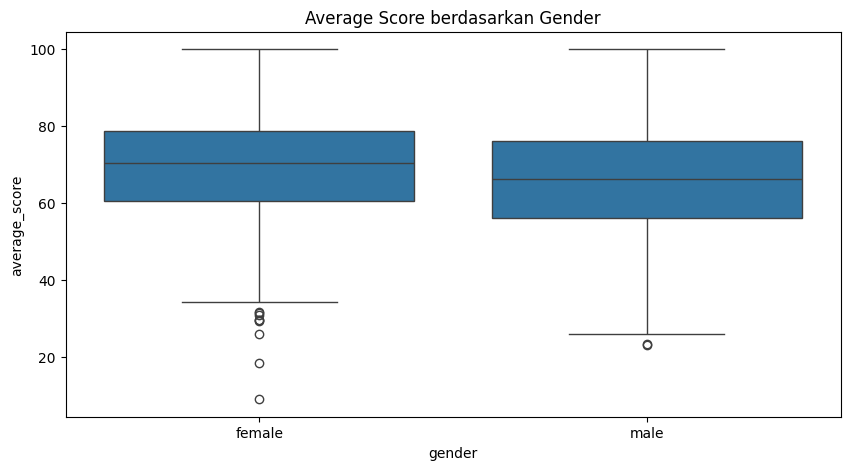

In [10]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='gender', y='average_score', data=df)
plt.title("Average Score berdasarkan Gender")
plt.show()


**Insight :**
* Median skor rata-rata siswa perempuan sedikit lebih tinggi dibandingkan siswa laki-laki.

* Distribusi skor perempuan lebih tersebar secara merata, meskipun terdapat beberapa outlier dengan skor sangat rendah.

* Siswa laki-laki menunjukkan sebaran skor yang sedikit lebih rendah, dan rentang nilai bawahnya lebih besar dari perempuan.

* Rentang maksimum hampir sama, namun siswa perempuan cenderung mendominasi pada skor menengah ke atas.



# **5. Data Preprocessing**

In [11]:
# Deteksi Outlier
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))
print("\\nJumlah Outlier per Kolom:")
print(outlier_mask.sum())

\nJumlah Outlier per Kolom:
math score       8
reading score    6
writing score    5
average_score    6
dtype: int64


**Insigth:**Terdapat 8 outlier pada kolom math score, 6 pada reading score, 5 pada writing score, dan 6 pada average_score.



In [23]:
# menghapus data outlier
df = df[~outlier_mask.any(axis=1)]
print("Ukuran data setelah outlier dihapus:", df.shape)

Ukuran data setelah outlier dihapus: (988, 9)


**Insight:**
* Ukuran data berkurang dari 1000 menjadi 988 baris, artinya hanya 12 data (1,2%) yang dihapus.

* Penghapusan ini tidak terlalu mempengaruhi ukuran dataset secara keseluruhan.

* Langkah ini dapat membantu meningkatkan stabilitas dan akurasi model, terutama untuk model yang sensitif terhadap nilai ekstrem.

* Dataset sekarang lebih bersih dan representatif terhadap pola umum tanpa gangguan dari nilai yang terlalu menyimpang.

In [24]:
# Encoding Kolom Kategorikal
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

print("\nHasil Encoding:")
for col in categorical_cols:
    mapping = dict(zip(encoders[col].classes_, encoders[col].transform(encoders[col].classes_)))
    print(f"{col}: {mapping}")



Hasil Encoding:
gender: {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
race/ethnicity: {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4)}
parental level of education: {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5)}
lunch: {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
test preparation course: {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}


**Insight:**
* Seluruh fitur kategorikal telah berhasil diubah ke bentuk numerik menggunakan label encoding.

* Struktur encoding mempertahankan jumlah kategori asli:

1. gender: 2 kategori

2. race/ethnicity: 5 kategori

3. parental level of education: 6 kategori

4. lunch: 2 kategori

5. test preparation course: 2 kategori

In [26]:
# Standardisasi Fitur Numerik
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [27]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,0,1,1,1,1,0.373174,0.168406,0.374241,0.323940
1,0,2,4,1,0,0.164871,1.453233,1.338567,1.037409
2,0,1,3,1,1,1.622992,1.810130,1.682969,1.800083
3,1,0,0,0,1,-1.362684,-0.902283,-1.692172,-1.398227
4,1,2,4,1,1,0.650912,0.596682,0.443121,0.594566


**Insight:**
* Fitur kategorikal telah berhasil diencode menjadi numerik.

* Nilai ujian telah distandardisasi, terlihat dari sebaran nilai yang berkisar di sekitar 0.

* Kolom average_score menunjukkan rata-rata performa siswa; nilai positif mencerminkan performa di atas rata-rata, dan nilai negatif sebaliknya.

In [29]:
# Simpan Dataset Hasil Preprocessing
df.to_csv("students_performance_preprocessing.csv", index=False)
print("\nData hasil preprocessing: students_performance_preprocessing.csv")


Data hasil preprocessing: students_performance_preprocessing.csv
